In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_data = pd.read_csv('../input/spaceship-titanic/train.csv')
test_data = pd.read_csv('../input/spaceship-titanic/test.csv')
y = train_data.Transported
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_data.shape

(8693, 14)

In [4]:
test_data.shape

(4277, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [8]:
(train_data.isnull().sum().sum()/train_data.size)*100

1.9095824226389047

<AxesSubplot:>

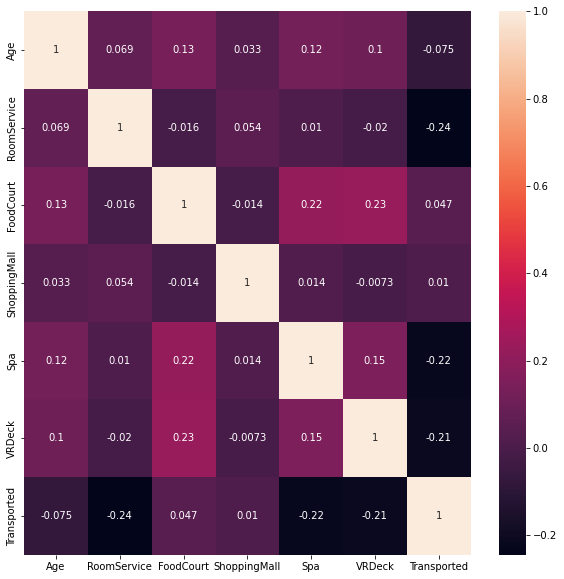

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
corr_mat = train_data.corr()
sns.heatmap(corr_mat, annot = True)

Strongest correlations indicate that the people who paid more for RoomService, Spa and VRDeck had a lower chance of being transported. 

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

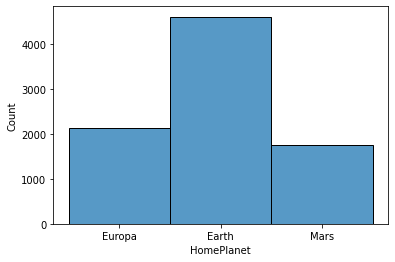

In [10]:
sns.histplot(data = train_data, x = 'HomePlanet')

In [11]:
train_data['HomePlanet'] = train_data['HomePlanet'].fillna('Earth')
test_data['HomePlanet'] = test_data['HomePlanet'].fillna('Earth')
train_data['HomePlanet'].isnull().sum()

0

In [12]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
test_data['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [14]:
train_data['CryoSleep'] = train_data['CryoSleep'].fillna('False')
test_data['CryoSleep'] = test_data['CryoSleep'].fillna('False')
train_data['CryoSleep'].isnull().sum()

0

In [15]:
train_data['Destination'].value_counts()
train_data['Destination'] = train_data['Destination'].fillna('TRAPPIST-1e')

In [16]:
test_data['Destination'].value_counts()
test_data['Destination'] = test_data['Destination'].fillna('TRAPPIST-1e')

<AxesSubplot:xlabel='Age', ylabel='Count'>

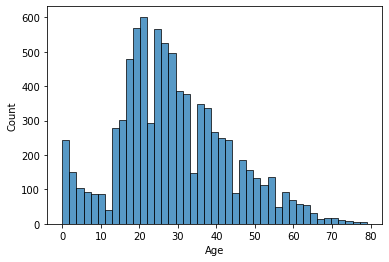

In [17]:
sns.histplot(data = train_data, x = 'Age')

In [18]:
train_data['Age'] = train_data['Age'].fillna(train_data.Age.median())
test_data['Age'] = test_data['Age'].fillna(test_data.Age.median())

In [19]:
train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [20]:
test_data['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [21]:
train_data['VIP'] = train_data['VIP'].fillna('False')
test_data['VIP'] = test_data['VIP'].fillna('False')

<AxesSubplot:xlabel='RoomService', ylabel='Density'>

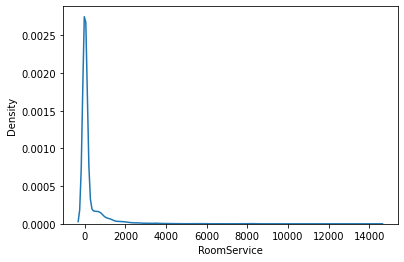

In [22]:
sns.kdeplot(data = train_data, x = 'RoomService')

In [23]:
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
test_data['RoomService'] = test_data['RoomService'].fillna(test_data['RoomService'].mean())

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

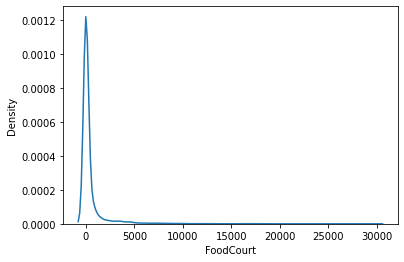

In [24]:
sns.kdeplot(data = train_data, x = 'FoodCourt')

In [25]:
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(test_data['FoodCourt'].mean())

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

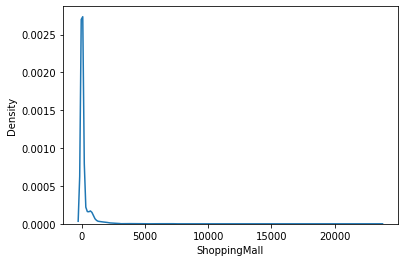

In [26]:
sns.kdeplot(data = train_data, x = 'ShoppingMall')

In [27]:
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].mean())

<AxesSubplot:xlabel='Spa', ylabel='Density'>

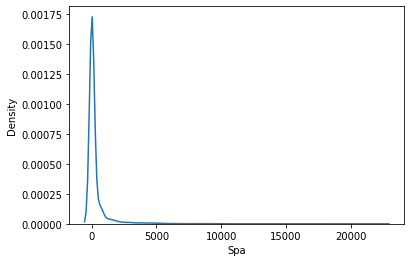

In [28]:
sns.kdeplot(data = train_data, x = 'Spa')

In [29]:
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
test_data['Spa'] = test_data['Spa'].fillna(test_data['Spa'].mean())

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

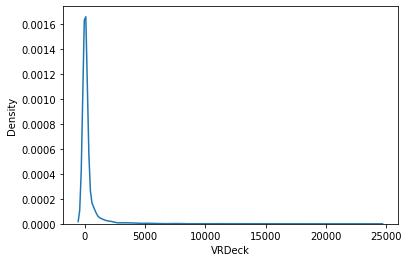

In [30]:
sns.kdeplot(data = train_data, x = 'VRDeck')

In [31]:
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].mean())

In [32]:
train_data = train_data.drop(['PassengerId','Cabin','Name'], axis = 1)
test_ids = test_data.PassengerId
test_data = test_data.drop(['PassengerId','Cabin','Name'], axis = 1)

In [33]:
train_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [34]:
 test_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [35]:
train_data.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

train_data['CryoSleep'] = train_data['CryoSleep'].astype('bool')
train_data['VIP'] = train_data['VIP'].astype('bool')
test_data['CryoSleep'] = test_data['CryoSleep'].astype('bool')
test_data['VIP'] = test_data['VIP'].astype('bool')

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = lbl_encoder.fit_transform(train_data[col])
    elif train_data[col].dtype == 'bool':
        train_data[col] = train_data[col].astype('int')
        
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = lbl_encoder.fit_transform(test_data[col])
    elif test_data[col].dtype == 'bool':
        test_data[col] = test_data[col].astype('int')

train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [37]:
from sklearn.model_selection import train_test_split
y = train_data.Transported
x = train_data.drop(['Transported'], axis = 1)
print(x.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        109.0        9.0   
2           1          0            2  58.0    1         43.0     3576.0   
3           1          0            2  33.0    0          0.0     1283.0   
4           0          0            2  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  
0           0.0     0.0     0.0  
1          25.0   549.0    44.0  
2           0.0  6715.0    49.0  
3         371.0  3329.0   193.0  
4         151.0   565.0     2.0  


In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int64  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 334.3 KB


In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(max_depth = 5, random_state = 10)
my_model.fit(x_train, y_train)
preds = my_model.predict(x_test)
print(mean_absolute_error(preds,y_test))

0.21970858895705522


In [40]:
preds = my_model.predict(test_data)
submission = pd.DataFrame({'PassengerId': test_ids,'Transported': preds.astype('bool')})
submission


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [41]:
submission.to_csv('submission.csv', index= None)